In [1]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
import numpy as np
import pickle
import random
from numpy.random import seed
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import pandas as pd
from secrets import randbelow

In [2]:
pickle_in = open("Xtrain96.pickle","rb")
Xtrain = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain = pickle.load(pickle_in)

Xtrain=np.array(Xtrain/255.0)
ytrain=np.array(ytrain)

pickle_in = open("Xval96.pickle","rb")
Xval = pickle.load(pickle_in)

pickle_in = open("yval96.pickle","rb")
yval = pickle.load(pickle_in)

pickle_in = open("XTest96.pickle","rb")
Xtest = pickle.load(pickle_in)

pickle_in = open("ytest96.pickle","rb")
ytest = pickle.load(pickle_in)

pickle_in = open("Xtrain96.pickle","rb")
Xtrain2 = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain2 = pickle.load(pickle_in)

# Genetic Algorithm

In [3]:
class GA():
    def __init__(self,popsize, iter_):
        self.popsize = popsize
        self.iter_ = iter_
        
    def popinit(self):
        population = [] 
        random.seed(0)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(self.popsize):
            inPop = [random.choice(fmap),random.choice(kernel),random.choice(learningRate),random.choice(dropout),random.choice(layer),random.choice(pool),random.choice(node)]
            population.append(inPop)
        return population

        
    def fitness(self,population,X,y):
        savefit=[]
        for i in range(len(population)):
            pop = population[i]
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

        return savefit
    
    def fitmutation(self,mut,X,y):
            pop = mut
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse
            return fitmut
        
    
    def parent_select(self,population, fitness):
        sumfit = np.sum(fitness)
        prob=[]
        parent_1=[]
        random.seed(0)
        for i in range(len(fitness)):
            tmp = fitness[i]/sumfit
            prob.append(tmp)
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
                sum_ += prob[i]
                prob_range.append(sum_)
        for i in range(len(prob)):
                rand = random.random()
                if rand <= prob_range[i]:
                    parent_1 = population[i]
                    break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
                for i in range(len(prob)):
                    rand = random.random()
                    if rand <= prob_range[i]:
                        parent_2 = population[i]
                        break
        return parent_1, parent_2
    
    def cross_over(self,parent1, parent2):
        random.seed(0)
        crosspoint = random.randrange(0,6)
        child1 = parent1[:crosspoint+1] + parent2[crosspoint+1:]
        child2 = parent2[:crosspoint+1] + parent1[crosspoint+1:] 
        return child1, child2
    
    def mutation(self,child1, child2):
        import copy
        random.seed(0)
        tmp1 = copy.deepcopy(child1)
        tmp2 = copy.deepcopy(child2)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(len(tmp1)):    
            if (i == 0) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(fmap)
                    tmp2[point] = random.choice(fmap)
            elif (i ==1):
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(kernel)
                    tmp2[point] = random.choice(kernel)
            elif (i == 2) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(learningRate)
                    tmp2[point] = random.choice(learningRate)
            elif (i == 3) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(dropout)
                    tmp2[point] = random.choice(dropout)
            elif (i == 4) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(layer)
                    tmp2[point] = random.choice(layer)
            elif (i == 5) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(pool)
                    tmp2[point] = random.choice(pool)
            else :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(node)
                    tmp2[point] = random.choice(node)
        return tmp1, tmp2
       
    def sort(self, population, fitness):
        tmp_dict = {'population' : population,'fitness': fitness }
        df = pd.DataFrame(tmp_dict)
        df.sort_values('fitness', ascending=True, inplace=True)
        new_pop = df['population'].values.tolist()
        fit = df['fitness'].values.tolist()
        return new_pop, fit
    
    def newfit(self,mut1,mut2,listindividu,X,y) :
        tmpmut=[]
        tmpfit1=0.0
        tmpfit2=0.0
        tmpmut.append(mut1)
        tmpmut.append(mut2)
        for i in listindividu:
            if i[0] == mut1 :
                tmpfit1  = (i[1])
            if i[0] == mut2 :
                tmpfit2 = (i[1])
        if (tmpfit1)==0.0 and (tmpfit2)==0.0 :
            fitness = self.fitness(tmpmut,X,y)
            fit1 = fitness[0]
            fit2 = fitness[1]
        elif (tmpfit1)==0.0 :
            fit1 = self.fitmutation(mut1,X,y)
            fit2 = tmpfit2
        else :
            fit1= tmpfit1
            fit2 = self.fitmutation(mut2,X,y)
        return fit1,fit2
                        
    
    def fit(self,X,y):
        pop = self.popinit()
        fitness = self.fitness(pop,X,y)
        listindividu =[]
        for i in range(len(pop)):
            a = pop[i]
            b = fitness[i]
            temp=[a,b]
            listindividu.append(temp)
        print(pop)
        print(fitness)
        bestingen =[]
        index = np.argmin(fitness)
        popgen = pop[index]
        fitgen = fitness[index]
        bestingen.append('Generasi 0')
        bestingen.append(popgen)
        bestingen.append(fitgen)
        for i in range(self.iter_):
            print( 'Generasi Ke ' , i+1 )
            parent_1, parent_2 = self.parent_select(pop, fitness)
            print('Parent 1 dan 2 ', parent_1, parent_2)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            print('Child 1 dan 2', child_1, child_2 )
            mut1, mut2 = self.mutation(child_1, child_2)
            print('Mutasi 1 dan 2', mut1, mut2)
            pop, fitness = self.sort(pop,fitness)
            fitmut1,fitmut2 = self.newfit(mut1,mut2,listindividu,X,y)
            pop[-1] = mut1; pop[-2] = mut2
            fitness[-1] = fitmut1 ; fitness[-2] = fitmut2
            mutt=[]
            mutt.append(mut1)
            mutt.append(mut2)
            fitmut=[]
            fitmut.append(fitmut1)
            fitmut.append(fitmut2)
            update=[]
            for i in range(len(mutt)) :
                a = mutt[i]
                b = fitmut[i]
                temp=[a,b]
                update.append(temp)
            listindividu.extend(update)
            print(pop)
            print(fitness)
            index = np.argmin(fitness)
            popgen = pop[index]
            fitgen = fitness[index]
            bestingen.append(popgen)
            bestingen.append(fitgen)
        idx_ = np.argmin(fitness)
        best_pop = pop[idx_]
        return  best_pop,bestingen

In [4]:
featSelection = GA( popsize=10, iter_=20)

In [5]:
feat,besteverygen = featSelection.fit(Xtrain,ytrain)

Epoch 1/10
66/66 [==============================] - 284s 121ms/step - loss: 0.6934 - accuracy: 0.4920 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6916 - accuracy: 0.5329 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6931 - accuracy: 0.4876 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6934 - accuracy: 0.4739 - val_loss: 0.6912 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 4s 57ms/step - loss: 0.6924 - accuracy: 0.5168 - val_loss: 0.6896 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 4s 59ms/step - loss: 0.6876 - accuracy: 0.5463 - val_loss: 0.6860 - val_accuracy: 0.5123
Epoch 7/10
66/66 [==============================] - 4s 60ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6962 - val_accuracy: 0.5190
Epoch 8/10

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 43ms/step - loss: 0.7709 - accuracy: 0.5309 - val_loss: 0.6924 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6937 - accuracy: 0.5223 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6938 - accuracy: 0.4937 - val_loss: 0.6976 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 18ms/step - loss: 0.7001 - accuracy: 0.4983 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6929 - accuracy: 0.5243 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6940 - accuracy: 0.5159 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 52ms/step - loss: 0.6945 - accuracy: 0.5072 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5346 - val_loss: 0.6928 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6925 - accuracy: 0.5213 - val_loss: 0.6918 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6683 - accuracy: 0.5677 - val_loss: 0.5895 - val_accuracy: 0.6846
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5644 - accuracy: 0.6987 - val_loss: 0.4190 - val_accuracy: 0.8121
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3979 - accuracy: 0.8429 - val_loss: 0.2560 - val_accuracy: 0.9038
Epoch 7/10
66/66 [==============================] - 0s 8ms/step - loss: 0.3367 - accuracy: 0.8794 - val_loss: 0.2018 - val_accuracy: 0.9217
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 51ms/step - loss: 0.6938 - accuracy: 0.5105 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5405 - val_loss: 0.6813 - val_accuracy: 0.6152
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6751 - accuracy: 0.6015 - val_loss: 0.6583 - val_accuracy: 0.5503
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6153 - accuracy: 0.6622 - val_loss: 0.5835 - val_accuracy: 0.6868
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5725 - accuracy: 0.7100 - val_loss: 0.5188 - val_accuracy: 0.7315
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4715 - accuracy: 0.7806 - val_loss: 0.4022 - val_accuracy: 0.8121
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.3671 - accuracy: 0.8588 - val_loss: 0.3033 - val_accuracy: 0.8904
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 10s 99ms/step - loss: 0.7024 - accuracy: 0.5259 - val_loss: 0.6919 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6896 - accuracy: 0.5300 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6916 - accuracy: 0.5255 - val_loss: 0.6892 - val_accuracy: 0.5481
Epoch 4/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6905 - accuracy: 0.5201 - val_loss: 0.6845 - val_accuracy: 0.5324
Epoch 5/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6780 - accuracy: 0.5542 - val_loss: 0.6657 - val_accuracy: 0.5682
Epoch 6/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6722 - accuracy: 0.6198 - val_loss: 0.6361 - val_accuracy: 0.6152
Epoch 7/10
66/66 [==============================] - 3s 43ms/step - loss: 0.6450 - accuracy: 0.6125 - val_loss: 0.6306 - val_accuracy: 0.6443
Epoch 8/10
6

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5081 - val_loss: 0.6925 - val_accuracy: 0.5302
Epoch 2/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5280 - val_loss: 0.6910 - val_accuracy: 0.6734
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.6396 - val_loss: 0.6893 - val_accuracy: 0.5280
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6902 - accuracy: 0.5130 - val_loss: 0.6850 - val_accuracy: 0.6264
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6836 - accuracy: 0.6243 - val_loss: 0.6764 - val_accuracy: 0.6577
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6345 - val_loss: 0.6636 - val_accuracy: 0.6846
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6611 - accuracy: 0.6456 - val_loss: 0.6430 - val_accuracy: 0.6756
Epoch 8/10
66/66 [==

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 32ms/step - loss: 0.7985 - accuracy: 0.4933 - val_loss: 0.6927 - val_accuracy: 0.5839
Epoch 2/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6944 - accuracy: 0.5320 - val_loss: 0.6853 - val_accuracy: 0.5481
Epoch 3/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6807 - accuracy: 0.5435 - val_loss: 0.6483 - val_accuracy: 0.6353
Epoch 4/10
66/66 [==============================] - 1s 14ms/step - loss: 0.5715 - accuracy: 0.7200 - val_loss: 0.6241 - val_accuracy: 0.6577
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5057 - accuracy: 0.7682 - val_loss: 0.3991 - val_accuracy: 0.8143
Epoch 6/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4356 - accuracy: 0.8264 - val_loss: 0.3248 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.3112 - accuracy: 0.8807 - val_loss: 0.2577 - val_accuracy: 0.8971
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 28ms/step - loss: 1.6344 - accuracy: 0.5253 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6923 - accuracy: 0.5329 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4849 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6946 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4876 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 24ms/step - loss: 0.7016 - accuracy: 0.5517 - val_loss: 0.6908 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.5435 - val_loss: 0.6923 - val_accuracy: 0.5906
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5365 - val_loss: 0.6875 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5655 - val_loss: 0.5529 - val_accuracy: 0.7405
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.6586 - val_loss: 0.5361 - val_accuracy: 0.7405
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5415 - accuracy: 0.7006 - val_loss: 0.4664 - val_accuracy: 0.7584
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4858 - accuracy: 0.7520 - val_loss: 0.4757 - val_accuracy: 0.7808
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 37ms/step - loss: 0.6950 - accuracy: 0.4833 - val_loss: 0.6919 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6903 - accuracy: 0.5419 - val_loss: 0.6831 - val_accuracy: 0.5705
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6780 - accuracy: 0.5968 - val_loss: 0.6837 - val_accuracy: 0.5145
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6914 - accuracy: 0.5564 - val_loss: 0.6602 - val_accuracy: 0.6242
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6566 - accuracy: 0.6015 - val_loss: 0.6366 - val_accuracy: 0.6264
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6490 - accuracy: 0.6652 - val_loss: 0.5715 - val_accuracy: 0.7338
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5618 - accuracy: 0.7130 - val_loss: 0.5521 - val_accuracy: 0.7360
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4958 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5476 - val_loss: 0.6862 - val_accuracy: 0.5749
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.5941 - val_loss: 0.6768 - val_accuracy: 0.5190
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.5679 - val_loss: 0.6245 - val_accuracy: 0.6689
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6307 - accuracy: 0.6190 - val_loss: 0.5674 - val_accuracy: 0.7204
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7398 - val_loss: 0.4504 - val_accuracy: 0.8031
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5689 - accuracy: 0.7095 - val_loss: 0.3160 - val_accuracy: 0.8949
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 67ms/step - loss: 0.6945 - accuracy: 0.4942 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 48ms/step - loss: 0.6912 - accuracy: 0.5327 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6934 - accuracy: 0.4776 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 45ms/step - loss: 0.6939 - accuracy: 0.4715 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6936 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 22ms/step - loss: 0.6922 - accuracy: 0.5700 - val_loss: 0.6694 - val_accuracy: 0.5973
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6472 - accuracy: 0.6249 - val_loss: 0.5287 - val_accuracy: 0.7405
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5484 - accuracy: 0.7327 - val_loss: 0.5654 - val_accuracy: 0.6980
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5057 - accuracy: 0.7725 - val_loss: 0.4441 - val_accuracy: 0.8277
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4291 - accuracy: 0.8151 - val_loss: 0.4189 - val_accuracy: 0.8054
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4509 - accuracy: 0.7830 - val_loss: 0.3198 - val_accuracy: 0.8859
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.3520 - accuracy: 0.8575 - val_loss: 0.3401 - val_accuracy: 0.8702
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 38ms/step - loss: 0.6840 - accuracy: 0.5261 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4749 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6946 - accuracy: 0.4760 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.4849 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 3s 31ms/step - loss: 0.6937 - accuracy: 0.5099 - val_loss: 0.6930 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6904 - accuracy: 0.5431 - val_loss: 0.6928 - val_accuracy: 0.5772
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6928 - accuracy: 0.5249 - val_loss: 0.6926 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6942 - accuracy: 0.4731 - val_loss: 0.6796 - val_accuracy: 0.5414
Epoch 5/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6717 - accuracy: 0.6284 - val_loss: 0.5780 - val_accuracy: 0.7025
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5845 - accuracy: 0.7071 - val_loss: 0.5397 - val_accuracy: 0.7248
Epoch 7/10
66/66 [==============================] - 1s 22ms/step - loss: 0.5343 - accuracy: 0.7436 - val_loss: 0.5442 - val_accuracy: 0.7271
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 46ms/step - loss: 0.6975 - accuracy: 0.5261 - val_loss: 0.6927 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6943 - accuracy: 0.5330 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6934 - accuracy: 0.4803 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6937 - accuracy: 0.4748 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6929 - accuracy: 0.5048 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6932 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 25ms/step - loss: 0.6959 - accuracy: 0.5103 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6929 - accuracy: 0.5099 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6935 - accuracy: 0.4836 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6944 - accuracy: 0.4626 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6935 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6935 - accuracy: 0.4811 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6928 - accuracy: 0.5074 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 21ms/step - loss: 0.6939 - accuracy: 0.5395 - val_loss: 0.6791 - val_accuracy: 0.4966
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6580 - accuracy: 0.6035 - val_loss: 0.5669 - val_accuracy: 0.6957
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5832 - accuracy: 0.7095 - val_loss: 0.5363 - val_accuracy: 0.7271
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4972 - accuracy: 0.7574 - val_loss: 0.4646 - val_accuracy: 0.8031
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4408 - accuracy: 0.8136 - val_loss: 0.4111 - val_accuracy: 0.8233
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4019 - accuracy: 0.8128 - val_loss: 0.3499 - val_accuracy: 0.8523
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.3490 - accuracy: 0.8639 - val_loss: 0.2943 - val_accuracy: 0.8859
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5056 - val_loss: 0.6792 - val_accuracy: 0.5056
Epoch 2/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6651 - accuracy: 0.6011 - val_loss: 0.6509 - val_accuracy: 0.7136
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.6889 - val_loss: 0.6461 - val_accuracy: 0.5347
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6391 - accuracy: 0.6175 - val_loss: 0.5871 - val_accuracy: 0.7360
Epoch 5/10
66/66 [==============================] - ETA: 0s - loss: 0.5850 - accuracy: 0.73 - 0s 5ms/step - loss: 0.5819 - accuracy: 0.7376 - val_loss: 0.5364 - val_accuracy: 0.7763
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5180 - accuracy: 0.7753 - val_loss: 0.4965 - val_accuracy: 0.8031
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4701 - accuracy: 0.8074 - val_loss: 0.4603 - val_accura

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 23ms/step - loss: 0.7200 - accuracy: 0.4742 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6938 - accuracy: 0.4752 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6941 - accuracy: 0.4733 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6937 - accuracy: 0.4975 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6935 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 23ms/step - loss: 0.7201 - accuracy: 0.4800 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6935 - accuracy: 0.4817 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6942 - accuracy: 0.4568 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6935 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6930 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6933 - accuracy: 0.5152 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 23ms/step - loss: 0.6952 - accuracy: 0.5256 - val_loss: 0.6909 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6837 - accuracy: 0.5887 - val_loss: 0.6147 - val_accuracy: 0.6823
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6297 - accuracy: 0.6756 - val_loss: 0.5799 - val_accuracy: 0.6913
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5566 - accuracy: 0.7209 - val_loss: 0.5229 - val_accuracy: 0.7606
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5070 - accuracy: 0.7689 - val_loss: 0.4742 - val_accuracy: 0.7830
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5075 - accuracy: 0.7594 - val_loss: 0.4247 - val_accuracy: 0.8345
Epoch 7/10
66/66 [==============================] - 2s 24ms/step - loss: 0.4357 - accuracy: 0.7999 - val_loss: 0.3909 - val_accuracy: 0.8412
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.4986 - val_loss: 0.6928 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5347 - val_loss: 0.6919 - val_accuracy: 0.4966
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5106 - val_loss: 0.6913 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.4979 - val_loss: 0.6887 - val_accuracy: 0.5078
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6879 - accuracy: 0.5976 - val_loss: 0.6843 - val_accuracy: 0.7136
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.6697 - val_loss: 0.6767 - val_accuracy: 0.5928
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.6339 - val_loss: 0.6599 - val_accuracy: 0.6935
Epoch 8/10
66/66 [==

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 6s 55ms/step - loss: 0.6945 - accuracy: 0.5108 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6925 - accuracy: 0.5347 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6937 - accuracy: 0.4914 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6944 - accuracy: 0.4763 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6940 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6934 - accuracy: 0.4870 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 21ms/step - loss: 0.6989 - accuracy: 0.5344 - val_loss: 0.6768 - val_accuracy: 0.4966
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6590 - accuracy: 0.6097 - val_loss: 0.5696 - val_accuracy: 0.6935
Epoch 3/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5782 - accuracy: 0.7096 - val_loss: 0.5651 - val_accuracy: 0.6957
Epoch 4/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5132 - accuracy: 0.7692 - val_loss: 0.4203 - val_accuracy: 0.8322
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4309 - accuracy: 0.8232 - val_loss: 0.4488 - val_accuracy: 0.7808
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4213 - accuracy: 0.7934 - val_loss: 0.3272 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 1s 18ms/step - loss: 0.3640 - accuracy: 0.8534 - val_loss: 0.3167 - val_accuracy: 0.8792
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 23ms/step - loss: 0.6921 - accuracy: 0.5703 - val_loss: 0.6687 - val_accuracy: 0.6443
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6491 - accuracy: 0.6255 - val_loss: 0.5356 - val_accuracy: 0.7248
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5512 - accuracy: 0.7514 - val_loss: 0.5848 - val_accuracy: 0.6711
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5104 - accuracy: 0.7724 - val_loss: 0.4625 - val_accuracy: 0.8143
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4476 - accuracy: 0.8051 - val_loss: 0.4393 - val_accuracy: 0.7942
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4286 - accuracy: 0.8056 - val_loss: 0.3429 - val_accuracy: 0.8725
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.3594 - accuracy: 0.8651 - val_loss: 0.3443 - val_accuracy: 0.8568
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.7060 - accuracy: 0.5310 - val_loss: 0.6610 - val_accuracy: 0.7383
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.6353 - val_loss: 0.6234 - val_accuracy: 0.7562
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6304 - accuracy: 0.6597 - val_loss: 0.6044 - val_accuracy: 0.6331
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.6708 - val_loss: 0.5442 - val_accuracy: 0.7584
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5645 - accuracy: 0.7397 - val_loss: 0.5288 - val_accuracy: 0.7338
Epoch 6/10
66/66 [==============================] - ETA: 0s - loss: 0.5087 - accuracy: 0.78 - 0s 6ms/step - loss: 0.5089 - accuracy: 0.7800 - val_loss: 0.4975 - val_accuracy: 0.7584
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4837 - accuracy: 0.7759 - val_loss: 0.4450 - val_accura

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 9ms/step - loss: 0.7080 - accuracy: 0.5245 - val_loss: 0.6786 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.5821 - val_loss: 0.6459 - val_accuracy: 0.7897
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6389 - accuracy: 0.7048 - val_loss: 0.6416 - val_accuracy: 0.5257
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6288 - accuracy: 0.6643 - val_loss: 0.5713 - val_accuracy: 0.7897
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.7547 - val_loss: 0.5185 - val_accuracy: 0.8322
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5232 - accuracy: 0.7607 - val_loss: 0.4771 - val_accuracy: 0.8322
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.7996 - val_loss: 0.4341 - val_accuracy: 0.8456
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.7080 - accuracy: 0.5245 - val_loss: 0.6786 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.5821 - val_loss: 0.6459 - val_accuracy: 0.7897
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6389 - accuracy: 0.7048 - val_loss: 0.6416 - val_accuracy: 0.5257
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6288 - accuracy: 0.6643 - val_loss: 0.5714 - val_accuracy: 0.7897
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5704 - accuracy: 0.7532 - val_loss: 0.5185 - val_accuracy: 0.8300
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5234 - accuracy: 0.7584 - val_loss: 0.4772 - val_accuracy: 0.8322
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.8015 - val_loss: 0.4344 - val_accuracy: 0.8434
Epoch 8/10
66/66 [=============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 23ms/step - loss: 0.6921 - accuracy: 0.5706 - val_loss: 0.6693 - val_accuracy: 0.7069
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6526 - accuracy: 0.6132 - val_loss: 0.5699 - val_accuracy: 0.6846
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5665 - accuracy: 0.7274 - val_loss: 0.5940 - val_accuracy: 0.6711
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5200 - accuracy: 0.7678 - val_loss: 0.4793 - val_accuracy: 0.7740
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4548 - accuracy: 0.7928 - val_loss: 0.4122 - val_accuracy: 0.8277
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4506 - accuracy: 0.7851 - val_loss: 0.3420 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.3592 - accuracy: 0.8536 - val_loss: 0.3518 - val_accuracy: 0.8591
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 8ms/step - loss: 0.7060 - accuracy: 0.5310 - val_loss: 0.6610 - val_accuracy: 0.7383
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.6353 - val_loss: 0.6235 - val_accuracy: 0.7562
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6304 - accuracy: 0.6580 - val_loss: 0.6042 - val_accuracy: 0.6331
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.6778 - val_loss: 0.5454 - val_accuracy: 0.7606
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5644 - accuracy: 0.7349 - val_loss: 0.5286 - val_accuracy: 0.7315
Epoch 6/10
66/66 [==============================] - ETA: 0s - loss: 0.5096 - accuracy: 0.7809 ETA: 0s - loss: 0.5083 - accuracy:  - 0s 6ms/step - loss: 0.5099 - accuracy: 0.7794 - val_loss: 0.4973 - val_accuracy: 0.7539
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4840 - accuracy: 

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.6989 - accuracy: 0.5377 - val_loss: 0.6743 - val_accuracy: 0.5145
Epoch 2/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6545 - accuracy: 0.6315 - val_loss: 0.5646 - val_accuracy: 0.7002
Epoch 3/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5688 - accuracy: 0.7256 - val_loss: 0.5506 - val_accuracy: 0.7002
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5037 - accuracy: 0.7712 - val_loss: 0.4322 - val_accuracy: 0.8345
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4403 - accuracy: 0.8147 - val_loss: 0.4328 - val_accuracy: 0.7987
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4370 - accuracy: 0.7963 - val_loss: 0.3509 - val_accuracy: 0.8568
Epoch 7/10
66/66 [==============================] - 1s 18ms/step - loss: 0.3833 - accuracy: 0.8499 - val_loss: 0.3227 - val_accuracy: 0.8725
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.6990 - accuracy: 0.5389 - val_loss: 0.6793 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6627 - accuracy: 0.6213 - val_loss: 0.5628 - val_accuracy: 0.7204
Epoch 3/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5567 - accuracy: 0.7325 - val_loss: 0.5665 - val_accuracy: 0.6935
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5011 - accuracy: 0.7766 - val_loss: 0.4462 - val_accuracy: 0.8121
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4317 - accuracy: 0.8159 - val_loss: 0.4389 - val_accuracy: 0.7897
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.3821 - accuracy: 0.8316 - val_loss: 0.3132 - val_accuracy: 0.8837 0s - loss: 0.400
Epoch 7/10
66/66 [==============================] - 1s 18ms/step - loss: 0.3580 - accuracy: 0.8549 - val_loss: 0.3093 - val_accuracy: 0.8949
Epoch 8

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.6990 - accuracy: 0.5342 - val_loss: 0.6784 - val_accuracy: 0.5101
Epoch 2/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6593 - accuracy: 0.6081 - val_loss: 0.5758 - val_accuracy: 0.6667
Epoch 3/10
66/66 [==============================] - 1s 18ms/step - loss: 0.5501 - accuracy: 0.7489 - val_loss: 0.5365 - val_accuracy: 0.7136
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4907 - accuracy: 0.7960 - val_loss: 0.4520 - val_accuracy: 0.8210
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4393 - accuracy: 0.8071 - val_loss: 0.4465 - val_accuracy: 0.7852
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4032 - accuracy: 0.8188 - val_loss: 0.3396 - val_accuracy: 0.8658
Epoch 7/10
66/66 [==============================] - 1s 18ms/step - loss: 0.3737 - accuracy: 0.8364 - val_loss: 0.3208 - val_accuracy: 0.8881
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.6991 - accuracy: 0.5304 - val_loss: 0.6802 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6647 - accuracy: 0.6076 - val_loss: 0.5842 - val_accuracy: 0.6711
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5752 - accuracy: 0.7145 - val_loss: 0.5162 - val_accuracy: 0.7248
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5004 - accuracy: 0.7692 - val_loss: 0.4542 - val_accuracy: 0.8322
Epoch 5/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4540 - accuracy: 0.8162 - val_loss: 0.4244 - val_accuracy: 0.8188
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4404 - accuracy: 0.8064 - val_loss: 0.3474 - val_accuracy: 0.8568
Epoch 7/10
66/66 [==============================] - 1s 18ms/step - loss: 0.3835 - accuracy: 0.8374 - val_loss: 0.3278 - val_accuracy: 0.8770
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 22ms/step - loss: 0.6988 - accuracy: 0.5383 - val_loss: 0.6791 - val_accuracy: 0.5772
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6646 - accuracy: 0.6187 - val_loss: 0.5921 - val_accuracy: 0.6532
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5876 - accuracy: 0.6847 - val_loss: 0.5199 - val_accuracy: 0.7293
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5127 - accuracy: 0.7705 - val_loss: 0.4410 - val_accuracy: 0.8345
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4413 - accuracy: 0.7952 - val_loss: 0.4388 - val_accuracy: 0.7919
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4300 - accuracy: 0.7925 - val_loss: 0.3426 - val_accuracy: 0.8613
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.3817 - accuracy: 0.8471 - val_loss: 0.3314 - val_accuracy: 0.8725
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 21ms/step - loss: 0.6990 - accuracy: 0.5326 - val_loss: 0.6757 - val_accuracy: 0.6130
Epoch 2/10
66/66 [==============================] - 1s 19ms/step - loss: 0.6617 - accuracy: 0.6459 - val_loss: 0.5770 - val_accuracy: 0.6667
Epoch 3/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5767 - accuracy: 0.7080 - val_loss: 0.5242 - val_accuracy: 0.7226
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 0.5095 - accuracy: 0.7609 - val_loss: 0.4541 - val_accuracy: 0.8076
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.4471 - accuracy: 0.8204 - val_loss: 0.4223 - val_accuracy: 0.8054
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 0.3997 - accuracy: 0.8110 - val_loss: 0.3272 - val_accuracy: 0.8770
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.3578 - accuracy: 0.8488 - val_loss: 0.3114 - val_accuracy: 0.8859
Epoch 8/10
66/66 [======

In [6]:
feat

[32, 2, 0.0001, 0.5, 6, 0, 256]

In [7]:
besteverygen

['Generasi 0',
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.19458220349908323,
 [128, 3, 0.001, 0.5, 2, 0, 128],
 0.19458220349908323,
 [128, 7, 0.0001, 0.4, 2, 1, 512],
 0.18325979003863033,
 [128, 7, 0.0001, 0.4, 2, 1, 512],
 0.18325979003863033,
 [128, 7, 0.0001, 0.4, 2, 1, 512],
 0.18325979003863033,
 [32, 2, 0.0001, 0.5, 3, 0, 256],
 0.1818740523075574,
 [32, 2, 0.0001, 0.5, 3, 0, 256],
 0.1818740523075574,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256],
 0.13972707441894341,
 [32, 2, 0.0001, 0.5, 6, 0, 256]

# CNN

In [77]:
            pop = feat
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(0)
            tf.random.set_seed(0)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain ,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP1.model')

            else :
                model.add(Conv2D(f,(k,k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 =model.fit(Xtrain, ytrain,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP1.model')

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.4986 - val_loss: 0.6928 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5350 - val_loss: 0.6919 - val_accuracy: 0.4877
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5095 - val_loss: 0.6914 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.4918 - val_loss: 0.6890 - val_accuracy: 0.5034
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5908 - val_loss: 0.6851 - val_accuracy: 0.7047
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6833 - accuracy: 0.6601 - val_loss: 0.6788 - val_accuracy: 0.5817
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6768 - accuracy: 0.6486 - val_loss: 0.6646 - val_accuracy: 0.6443
Epoch 8/10
66/66 [==

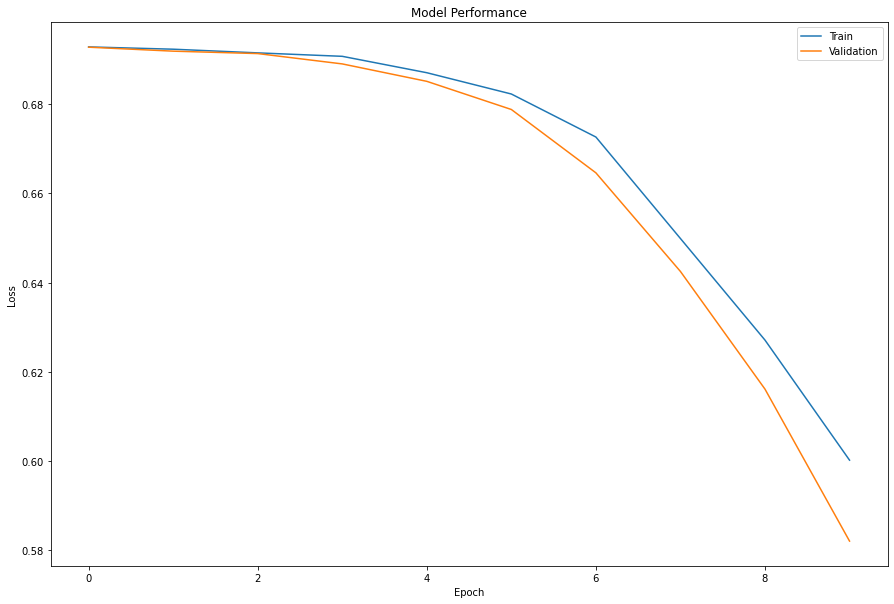

In [78]:
import matplotlib.pyplot as plt
#Loss Visualization for data training and validation

plt.figure(figsize=(15,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [79]:
model = tf.keras.models.load_model("CNNP1.model")

# Data Latih

In [80]:
prediction = model.predict(Xtrain2)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.7163978

In [81]:
m = tf.keras.metrics.Precision()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.70012707

In [82]:
m = tf.keras.metrics.Recall()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.7476255

In [83]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

186.0

In [84]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

236.0

In [85]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

515.0

In [86]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

551.0

# Data Validasi

In [87]:
prediction = model.predict(Xval)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.8536978

In [88]:
m = tf.keras.metrics.Precision()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.87543255

In [89]:
m = tf.keras.metrics.Recall()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.8214286

In [90]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

55.0

In [91]:
m = tf.keras.metrics.FalsePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

36.0

In [92]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

278.0

In [93]:
m = tf.keras.metrics.TruePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

253.0

# Data Uji

In [94]:
prediction = model.predict(Xtest)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.7358491

In [95]:
m = tf.keras.metrics.Precision()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.7171717

In [96]:
m = tf.keras.metrics.Recall()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.7717391

In [97]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

42.0

In [98]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

56.0

In [99]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

131.0

In [100]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

142.0